In [1]:
import os
import torch

os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.1.0+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 74.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
from termcolor import colored
from torch._C import dtype
import torch
from torch.nn import Linear
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
from torchsummary import summary
from torch.autograd import Variable
from keras import backend as K
import pandas as pd
import random
import json
import pickle
from itertools import islice
from numpy import load
import math
import torch_geometric
import ast
from torch_geometric.loader import DataLoader
from torch_geometric.loader import NeighborLoader
import statistics
from statistics import mean
from time import perf_counter

In [ ]:
possible_world8 = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/output_possible_world8.pt', map_location=torch.device('cpu'))

In [ ]:
data_label = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/data_label_encoded.pt')
train_mask = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/train_mask.pt')
test_mask = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/test_mask.pt')
data_x = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/data_x.pt')

edge_index = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/edge_index_T' + str(0) + '.pt')

In [ ]:
#data_possible_world = torch_geometric.data.Data(x=data_x, edge_index=edge_index, y=data_label, train_mask=train_mask, test_mask=test_mask)

In [ ]:
#data_loader = NeighborLoader(data_possible_world, num_neighbors=[-1], batch_size=256,
#                                input_nodes=torch.arange(data_possible_world.num_nodes), shuffle=False)

/usr/local/lib/python3.10/dist-packages/torch_geometric/sampler/neighbor_sampler.py:60: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [4]:
class GCN_model(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN_model, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(160, hidden_channels, bias=True)
        self.conv2 = GCNConv(hidden_channels, hidden_channels, bias=True)
        self.conv3 = GCNConv(hidden_channels, hidden_channels, bias=True)
        self.lin1 = Linear(hidden_channels, hidden_channels, bias=True)
        self.lin2 = Linear(hidden_channels, 8, bias=True)


        self.act_f = nn.Softmax(dim=1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)
        x = x.relu()
        x = self.lin1(x)
        x = x.relu()
        x = self.lin2(x)
        x = self.act_f(x)
        return x


In [5]:
GNN_Model = GCN_model(hidden_channels=100)

In [ ]:
print(GNN_Model)

GCN_model(
  (conv1): GCNConv(160, 100)
  (conv2): GCNConv(100, 100)
  (conv3): GCNConv(100, 100)
  (lin1): Linear(in_features=100, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=8, bias=True)
  (act_f): Softmax(dim=1)
)


In [ ]:
GNN_Model.load_state_dict(possible_world['model_state_dict'])

<All keys matched successfully>

In [ ]:
edge_index = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/edge_index_T' + str(0) + '.pt')

In [ ]:
edge_index1 = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/edge_index_T' + str(1) + '.pt')

In [ ]:
data_x = data_x.float()
preds = GNN_Model(data_x, edge_index)

In [ ]:
preds1 = GNN_Model(data_x, edge_index1)

In [ ]:
print(preds.size(), torch.sum(preds[0]))

torch.Size([632870, 8]) tensor(1.0000, grad_fn=<SumBackward0>)


In [9]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
authorID_2_nodefeatures_and_label = np.load(pathname + "authorID_2_nodefeatures_and_label.npy", allow_pickle=True).item()

In [10]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
authors_name_2_ID = np.load(pathname + "authors_name_2_ID.npy", allow_pickle=True).item()

In [11]:
authors_ID_2_name = inv_map = {v: k for k, v in authors_name_2_ID.items()}

In [ ]:
i = 0
for id, name in authors_ID_2_name.items():
    print(id, name)
    if i ==10:
        break
    i+=1

0 E. F. Codd
1 Ernest Mwebaze
2 John A. Quinn
3 Prateek Jain 0002
4 Pravesh Kothari
5 Abhradeep Thakurta
6 Mehreen Saeed
7 Michael McCann
8 Yuhua Li 0001
9 Liam P. Maguire
10 Adrian Johnston


Gautam Das, Xin Luna Dong, Yizhuo Sun, Katja Hose

In [12]:
print(authors_name_2_ID['Katja Hose'])
katja_id = authors_name_2_ID['Katja Hose']

61379


In [13]:
#print(authors_name_2_ID['Xin Luna Dong'])
#dong_id = authors_name_2_ID['Xin Luna Dong']

In [14]:
print(authors_name_2_ID['Arijit Khan 0001'])
arijit_id = authors_name_2_ID['Arijit Khan 0001']

66037


In [15]:
print(authors_name_2_ID['Gautam Das 0001'])
guatam_id = authors_name_2_ID['Gautam Das 0001']

50044


In [16]:
print(authors_name_2_ID['Yingzhuo Sun'])
sun_id = authors_name_2_ID['Yingzhuo Sun']

389045


In [17]:
#print(authors_name_2_ID['Xin Dong 0001'])
#xin_id = authors_name_2_ID['Xin Dong 0001']


In [18]:
print(authors_name_2_ID['Ce Zhang 0001'])
zhang_id = authors_name_2_ID['Ce Zhang 0001']


59392


In [19]:
print(authors_name_2_ID['Barna Saha'])
barna_id = authors_name_2_ID['Barna Saha']

48401


In [20]:
print(authors_name_2_ID['Elisa Bertino'])
bertino_id = authors_name_2_ID['Elisa Bertino']


53607


In [21]:
print(authors_name_2_ID['Margo I. Seltzer'])
margo_id = authors_name_2_ID['Margo I. Seltzer']


57169


In [22]:
print(authors_name_2_ID['Yizhou Sun'])
yizhou_id = authors_name_2_ID['Yizhou Sun']

61650


In [23]:
print(authors_name_2_ID['Jian Pei'])
jian_id = authors_name_2_ID['Jian Pei']

13011


In [24]:
print(authors_name_2_ID['Christos Faloutsos'])
christos_id = authors_name_2_ID['Christos Faloutsos']

59622


In [25]:
print(authors_name_2_ID['Jiawei Han 0001'])
jiawei_id = authors_name_2_ID['Jiawei Han 0001']

12106


In [26]:
print(authors_name_2_ID['Gerhard Weikum'])
gerhard_id = authors_name_2_ID['Gerhard Weikum']

52083


In [27]:
Katja_index = list(authorID_2_nodefeatures_and_label.keys()).index(katja_id)
#Dong_index = list(authorID_2_nodefeatures_and_label.keys()).index(dong_id)
Arijit_index = list(authorID_2_nodefeatures_and_label.keys()).index(arijit_id)
Guatam_index = list(authorID_2_nodefeatures_and_label.keys()).index(guatam_id)
Sun_index = list(authorID_2_nodefeatures_and_label.keys()).index(sun_id)
#Xin_index = list(authorID_2_nodefeatures_and_label.keys()).index(xin_id)
Zhang_index = list(authorID_2_nodefeatures_and_label.keys()).index(zhang_id)
Barna_index = list(authorID_2_nodefeatures_and_label.keys()).index(barna_id)
Bertino_index = list(authorID_2_nodefeatures_and_label.keys()).index(bertino_id)
Margo_index = list(authorID_2_nodefeatures_and_label.keys()).index(margo_id)
Yizhou_index = list(authorID_2_nodefeatures_and_label.keys()).index(yizhou_id)
Jian_index = list(authorID_2_nodefeatures_and_label.keys()).index(jian_id)
Christos_index = list(authorID_2_nodefeatures_and_label.keys()).index(christos_id)
Jiawei_index = list(authorID_2_nodefeatures_and_label.keys()).index(jiawei_id)
Gerhard_index = list(authorID_2_nodefeatures_and_label.keys()).index(gerhard_id)

In [28]:
print(Katja_index)
#print(Dong_index)
print(Arijit_index)
print(Guatam_index)
print(Sun_index)
#print(Xin_index)
print(Zhang_index)
print(Barna_index)
print(authorID_2_nodefeatures_and_label[barna_id])
print(authorID_2_nodefeatures_and_label[bertino_id])
print(authorID_2_nodefeatures_and_label[margo_id])
print(Yizhou_index)
print(Jian_index)
print(Christos_index)
print(Jiawei_index)
print(Gerhard_index)

61379
66037
50044
389045
59392
48401
{'node_features': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'label': 5}
{'node_features': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [29]:
labels = dict()
labels['Artificial Intelligence and Related Subjects']= ['AAAI', 'ACL', 'CVPR','EMNLP', 'ICCV', 'ICML', 'IJCAI', 'KDD', 'KR',
                                                         'NIPS', 'RSS', 'UAI', 'AI-ED', 'AID', 'AMAI', 'CAIP', 'COLING', 'CSSAC',
                                                         'CoNLL', 'DAS', 'DocEng', 'EACL', 'EAI', 'ECCV', 'EML', 'GECCO', 'IAAI',
                                                         'ICDAR', 'ICIP', 'ICNN', 'IJCNN', 'ICPR', 'ICTAI', 'NAACL', 'WACV',
                                                         'WIC', 'CSCL', 'AAI', 'ACCV', 'AI*IA', 'IEA', 'AIE', 'AIxIA', 'ANNIE',
                                                         'ANZIIS', 'ASADM', 'ASC', 'CAAI', 'CAIA', 'EPIA', 'FCKAML', 'ICADL',
                                                         'ICANN', 'ICCB', 'ICCC', 'ICGA', 'ICMS', 'ICONIP', 'ICPS', 'IEA/AIE',
                                                         'IROS', 'NLPRS', 'PACES', 'PACLIC', 'PAKDD', 'PAKDDM', 'PRICAI', 'RANLP',
                                                         'WCES', 'WCNN', 'MIC']

labels['Hardware and Architecture']= ['ASPLOS', 'DAC', 'HPCA', 'ICCAD', 'ISCA', 'MICRO', 'CASES', 'CODES+ISSS', 'DATE', 'FCCM',
                                      'FPL', 'HCS', 'ICS', 'SUPER', 'VLSI', 'ACS', 'EuroMICRO', 'ICA3PP', 'ISC']

labels['Applications and Media']= ['ACM-MM', 'I3DG', 'PECCS', 'SIGGRAPH', 'SIGIR', 'SIGMETRICS', 'WWW', 'ASS', 'CANIM', 'CGI',
                                   'EUROGRAPH', 'ICME', 'ICWE', 'JCDL', 'MASCOTS', 'MMCN', 'NOSSDAV', 'NetStore', 'PADS', 'PG',
                                   'PT', 'WSC', 'IEEE Visualization', 'VIS', 'ECDL', 'ACM-HPC', 'DS-RT', 'DSS', 'ECIR', 'ESS',
                                   'Ed-Media', 'HPCN', 'IMSA', 'MMM', 'SCSC', 'WCSS', 'GMP', 'WISE',
                                   'IEEE Intl Wshop on Dist Int Simuland Real-Time Applications']

labels['System Technology']= ['CCS', 'ICDCS', 'ICNP', 'INFOCOM', 'MOBICOM', 'MOBISYS', 'NSDI', 'PACT', 'PODC', 'RTSS', 'SIGCOMM',
                              'SOSDI', 'SOSP', 'SPAA', 'IEEE Symposium on Security and Privacy', 'ASAP', 'CC', 'CCC', 'CSFW',
                              'Euro-Par', 'IC3N', 'ICC', 'ICPP', 'IPCCC', 'IPDPS', 'LCN', 'PAM', 'SRDS', 'VMCAI', 'WCNC', 'WCW',
                              'Fast Software Encryption', 'FSE', 'Usenix Security Symposium',
                              'European Symposium on Research in Computer Security', 'ESORICS', 'CONPAR', 'GLOBECOM', 'ICCC',
                              'ICON', 'ICPADS', 'IN', 'INET', 'MPCS', 'NCC', 'NOMS', 'Softcomm', 'VAPP', 'Public Key Cryptosystems',
                              'PKC', 'Annual Workshop on Selected Areas in Cryptography', 'SAC',
                              'Australasia Conference on Information Security and Privacy', 'ACISP',
                              'Int. Conf on Inform and Comm. Security', 'ICICS', 'Workshop on Information Hiding', 'IG*MMSEC',
                              'IGMMSEC', 'Smart Card Research and Advanced Application Conference', 'CARDIS',
                              'Workshop on Security and Privacy in E-commerce', 'SPW']

labels['Programming Languages and Software Engineering']= ['CAV', 'FM/FME', 'FSE', 'ICFP', 'ICSE', 'OOPSLA', 'PLDI', 'POPL',
                                                           'APLAS', 'ASE', 'CAiSE', 'CP', 'ECOOP', 'ESOP', 'FOSSACS', 'GCSE',
                                                           'HASKELL', 'ICCL', 'ICECCS', 'ICSM', 'ICSR', 'ISRE', 'MPC', 'PADL',
                                                           'PEPM', 'PPDP', 'RTA', 'SAS', 'SEKE', 'TACAS', 'WCRE',
                                                           'IEEE Intl Conf on Formal Engineering Methods', 'ICFEM',
                                                           'Intl Conf on Integrated Formal Methods', 'iFM', 'ALP', 'APSEC',
                                                           'COMPSAC', 'FASE', 'ICCC', 'LOPSTR', 'PAP/PACT', 'PAP', 'PACT', 'PLILP',
                                                           'TAPSOFT', 'UML', 'Intl Conf of Z Users', 'Z User Group', 'ZUG',
                                                           'IFIP', 'FORTE']

labels['Algorithms and Theory']= ['COLT', 'CRYPTO', 'EUROCRYPT', 'FOCS', 'LICS', 'SCG', 'SODA', 'STOC', 'ALT', 'CADE', 'CC',
                                  'CONCUR', 'DSIC', 'ESA', 'EUROCOLT', 'EUROCRYPT', 'FST&TCS', 'FST', 'TCS', 'ICALP', 'IEEEIT',
                                  'IPCO', 'ISAAC', 'ISTCS', 'LATIN', 'LFCS', 'MFCS', 'STACS', 'SWAT', 'WADS', 'AAAAECC', 'ALEX',
                                  'ALG', 'ASIAN', 'AWTI', 'CATS', 'CCCG', 'COCOON', 'CSL', 'DMTCS', 'EWLR', 'FCT', 'FTP', 'GD',
                                  'ICCI', 'JCDCG', 'LPMA', 'MCU', 'MEGA', 'SIROCCO', 'UMC', 'WG']

labels['Data Bases']= ['ICDE', 'PODS', 'SIGMOD', 'VLDB', 'CIKM', 'CoopIS', 'DASFAA', 'DEXA', 'DOOD', 'EDBT', 'ER', 'FODO', 'SSD',
                       'SSDBM', 'ADBIS', 'ADC', 'ADTI', 'BNCOD', 'COMAD', 'DaWaK', 'FEWFDB', 'ICDM', 'IDEAS', 'IFIP-DBSEC',
                       'IFIP-DS', 'MDM', 'NGDB', 'VDB', 'RIDE Workshop']

labels['BioMedical']= ['ISMB', 'RECOMB', 'AMIA', 'CSB', 'CSB', 'DNA', 'MEDINFO', 'WABI', 'APAMI', 'BIBE', 'CITB', 'DILS', 'ECAIM',
                       'GIW', 'INBS', 'International Conference on Sequences and their Applications', 'SETA']


"""labels = dict()


labels['Artificial Intelligence and Related Subjects']= ['ICML', 'NIPS', 'RSS', 'UAI']

labels['Hardware and Architecture']= ['ASPLOS', 'DAC', 'HPCA', 'ICCAD', 'ISCA', 'MICRO']

labels['Applications and Media']= ['ACM-MM', 'I3DG', 'PECCS', 'SIGGRAPH', 'SIGIR']

labels['System Technology']= ['CCS', 'ICDCS', 'ICNP', 'INFOCOM']

labels['Programming Languages and Software Engineering']= ['CAV', 'FM/FME', 'FSE', 'ICFP', 'ICSE', 'OOPSLA', 'PLDI', 'POPL',
                                                           'APLAS', 'ASE']

labels['Algorithms and Theory']= ['COLT', 'CRYPTO', 'EUROCRYPT', 'FOCS', 'LICS', 'SCG', 'SODA', 'STOC']

labels['Data Bases']= ['ICDE', 'PODS', 'SIGMOD', 'VLDB', 'CIKM']

labels['BioMedical']= ['ISMB', 'RECOMB', 'AMIA', 'CSB', 'CSB', 'DNA', 'MEDINFO', 'WABI', 'APAMI', 'BIBE', 'CITB', 'DILS', 'ECAIM',
                       'GIW', 'INBS', 'International Conference on Sequences and their Applications', 'SETA']"""

"labels = dict()\n\n\nlabels['Artificial Intelligence and Related Subjects']= ['ICML', 'NIPS', 'RSS', 'UAI']\n\nlabels['Hardware and Architecture']= ['ASPLOS', 'DAC', 'HPCA', 'ICCAD', 'ISCA', 'MICRO']\n\nlabels['Applications and Media']= ['ACM-MM', 'I3DG', 'PECCS', 'SIGGRAPH', 'SIGIR']\n\nlabels['System Technology']= ['CCS', 'ICDCS', 'ICNP', 'INFOCOM']\n\nlabels['Programming Languages and Software Engineering']= ['CAV', 'FM/FME', 'FSE', 'ICFP', 'ICSE', 'OOPSLA', 'PLDI', 'POPL',\n                                                           'APLAS', 'ASE']\n\nlabels['Algorithms and Theory']= ['COLT', 'CRYPTO', 'EUROCRYPT', 'FOCS', 'LICS', 'SCG', 'SODA', 'STOC']\n\nlabels['Data Bases']= ['ICDE', 'PODS', 'SIGMOD', 'VLDB', 'CIKM']\n\nlabels['BioMedical']= ['ISMB', 'RECOMB', 'AMIA', 'CSB', 'CSB', 'DNA', 'MEDINFO', 'WABI', 'APAMI', 'BIBE', 'CITB', 'DILS', 'ECAIM',\n                       'GIW', 'INBS', 'International Conference on Sequences and their Applications', 'SETA']"

In [ ]:
print(list(labels.keys()))

['Artificial Intelligence and Related Subjects', 'Hardware and Architecture', 'Applications and Media', 'System Technology', 'Programming Languages and Software Engineering', 'Algorithms and Theory', 'Data Bases', 'BioMedical']


In [ ]:
for key, value in labels.items():
    print("We cover ", len(value), " conferences for ", key)

We cover  71  conferences for  Artificial Intelligence and Related Subjects
We cover  19  conferences for  Hardware and Architecture
We cover  39  conferences for  Applications and Media
We cover  63  conferences for  System Technology
We cover  52  conferences for  Programming Languages and Software Engineering
We cover  52  conferences for  Algorithms and Theory
We cover  29  conferences for  Data Bases
We cover  17  conferences for  BioMedical


In [ ]:
input_stats = dict()
for k in labels.keys():
    input_stats[k] = 0
print(input_stats)

{'Artificial Intelligence and Related Subjects': 0, 'Hardware and Architecture': 0, 'Applications and Media': 0, 'System Technology': 0, 'Programming Languages and Software Engineering': 0, 'Algorithms and Theory': 0, 'Data Bases': 0, 'BioMedical': 0}


In [ ]:
i=0
for key, value in authorID_2_nodefeatures_and_label.items():
    print(value)
    if i == 10:
        break
    i+=1

{'node_features': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'label': 6}
{'node_features': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
for key, values in authorID_2_nodefeatures_and_label.items():
    x = values['label']
    y = list(labels.keys())[x]
    input_stats[y] +=1

In [ ]:
for key, value in input_stats.items():
    print(key, " has ", value, " samples")

Artificial Intelligence and Related Subjects  has  240293  samples
Hardware and Architecture  has  49077  samples
Applications and Media  has  69069  samples
System Technology  has  122267  samples
Programming Languages and Software Engineering  has  53868  samples
Algorithms and Theory  has  22060  samples
Data Bases  has  45302  samples
BioMedical  has  30934  samples


In [ ]:
print("katja: ", preds[Katja_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Katja_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[katja_id]['label']])

#print("Dong: ", preds[Dong_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Dong_index])],
#      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[dong_id]['label']])

print("Arijit: ", preds[Arijit_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Arijit_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[arijit_id]['label']])

print("Gautam: ", preds[Guatam_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Guatam_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[guatam_id]['label']])

print("Sun: ", preds[Sun_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Sun_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[sun_id]['label']])

#print("Xin: ", preds[Xin_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Xin_index])],
#      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[xin_id]['label']])

print("Zhang: ", preds[Zhang_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Zhang_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[zhang_id]['label']])

print("Barna: ", preds[Barna_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Barna_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[barna_id]['label']])

print("Bertino: ", preds[Bertino_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Bertino_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[bertino_id]['label']])

print("Margo: ", preds[Margo_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Margo_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[margo_id]['label']])

print("Yizhou: ", preds[Yizhou_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Yizhou_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[yizhou_id]['label']])

print("Yizhou: ", preds[Jian_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Jian_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[jian_id]['label']])

print("Yizhou: ", preds[Christos_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Christos_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[christos_id]['label']])

print("Yizhou: ", preds[Jiawei_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Jiawei_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[jiawei_id]['label']])

print("Yizhou: ", preds[Gerhard_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds[Gerhard_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[gerhard_id]['label']])

NameError: ignored

In [ ]:
print("katja: ", preds1[Katja_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds1[Katja_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[katja_id]['label']])

print("Dong: ", preds1[Dong_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds1[Dong_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[dong_id]['label']])

print("Arijit: ", preds1[Arijit_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds1[Arijit_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[arijit_id]['label']])

print("Gautam: ", preds1[Guatam_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds1[Guatam_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[guatam_id]['label']])

print("Sun: ", preds1[Sun_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds1[Sun_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[sun_id]['label']])

print("Xin: ", preds1[Xin_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds1[Xin_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[xin_id]['label']])

print("Zhang: ", preds1[Zhang_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds1[Zhang_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[zhang_id]['label']])

print("Barna: ", preds1[Barna_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds1[Barna_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[barna_id]['label']])

print("Bertino: ", preds1[Bertino_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds1[Bertino_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[bertino_id]['label']])

print("Margo: ", preds1[Margo_index], "   Predicted Label: ", list(labels.keys())[torch.argmax(preds1[Margo_index])],
      "   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[margo_id]['label']])


katja:  tensor([3.1653e-04, 1.5360e-05, 3.7209e-04, 9.9589e-05, 2.7828e-04, 1.1731e-04,
        9.9879e-01, 8.4683e-06], grad_fn=<SelectBackward0>)    Predicted Label:  Data Bases    Real Label:  Data Bases
Dong:  tensor([0.2970, 0.0141, 0.0144, 0.0751, 0.1545, 0.0526, 0.3832, 0.0092],
       grad_fn=<SelectBackward0>)    Predicted Label:  Data Bases    Real Label:  Data Bases
Arijit:  tensor([2.8416e-03, 2.2730e-04, 2.1526e-03, 1.1958e-03, 1.9494e-03, 1.3641e-03,
        9.9017e-01, 9.8837e-05], grad_fn=<SelectBackward0>)    Predicted Label:  Data Bases    Real Label:  Data Bases
Gautam:  tensor([1.1877e-03, 8.4619e-05, 1.1014e-03, 4.6725e-04, 9.9927e-04, 5.5231e-04,
        9.9557e-01, 4.0321e-05], grad_fn=<SelectBackward0>)    Predicted Label:  Data Bases    Real Label:  Data Bases
Sun:  tensor([8.1563e-09, 4.7490e-10, 4.9774e-12, 1.0000e+00, 5.3274e-12, 1.7999e-12,
        5.3980e-11, 3.7772e-15], grad_fn=<SelectBackward0>)    Predicted Label:  System Technology    Real Label:  Sys

In [ ]:
print("Katja   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[katja_id]['label']])

print("Dong   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[dong_id]['label']])

print("Arijit   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[arijit_id]['label']])

print("Guatam   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[guatam_id]['label']])

print("Sun   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[sun_id]['label']])

print("Xin   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[xin_id]['label']])

print("Zhang   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[zhang_id]['label']])

print("Barna   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[barna_id]['label']])

print("Bertino   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[bertino_id]['label']])

print("Margo   Real Label: ", list(labels.keys())[authorID_2_nodefeatures_and_label[margo_id]['label']])


Katja   Real Label:  Data Bases
Dong   Real Label:  Data Bases
Arijit   Real Label:  Data Bases
Guatam   Real Label:  Data Bases
Sun   Real Label:  System Technology
Xin   Real Label:  Data Bases
Zhang   Real Label:  Artificial Intelligence and Related Subjects
Barna   Real Label:  Algorithms and Theory
Bertino   Real Label:  Data Bases
Margo   Real Label:  System Technology


In [6]:
data_x = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/data_x.pt')
data_x = data_x.float()

In [33]:
Katja_possible_world_preds = []
Dong_possible_world_preds = []
Arijit_possible_world_preds = []
Guatam_possible_world_preds = []
Sun_possible_world_preds = []
Xin_possible_world_preds = []
Zhang_possible_world_preds = []
Barna_possible_world_preds = []
Bertino_possible_world_preds = []
Margo_possible_world_preds = []
Yizhou_possible_world_preds = []
Jian_possible_world_preds = []
Christos_possible_world_preds = []
Jiawei_possible_world_preds = []
Gerhard_possible_world_preds = []




Zhang_possible_world_preds_updated = []
Barna_possible_world_preds_updated = []
Margo_possible_world_preds_updated = []
Yizhou_possible_world_preds_updated = []





number_of_possible_worlds = 10

In [34]:
for i in range(number_of_possible_worlds):
    possible_world = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/output_possible_world' + str(i) + '.pt', map_location=torch.device('cpu'))
    edge_index = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/edge_index_T' + str(i) + '.pt')
    GNN_Model = GCN_model(hidden_channels=100)
    GNN_Model.load_state_dict(possible_world['model_state_dict'])
    preds = GNN_Model(data_x, edge_index)

    B = torch.zeros_like(preds[Katja_index])
    B[torch.argmax(preds[Katja_index])] = 1
    Katja_possible_world_preds.append(B)

    #B = torch.zeros_like(preds[Dong_index])
    #B[torch.argmax(preds[Dong_index])] = 1
    #Dong_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Arijit_index])
    B[torch.argmax(preds[Arijit_index])] = 1
    Arijit_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Guatam_index])
    B[torch.argmax(preds[Guatam_index])] = 1
    Guatam_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Sun_index])
    B[torch.argmax(preds[Sun_index])] = 1
    Sun_possible_world_preds.append(B)

    #B = torch.zeros_like(preds[Xin_index])
    #B[torch.argmax(preds[Xin_index])] = 1
    #Xin_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Zhang_index])
    B[torch.argmax(preds[Zhang_index])] = 1
    Zhang_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Barna_index])
    B[torch.argmax(preds[Barna_index])] = 1
    Barna_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Bertino_index])
    B[torch.argmax(preds[Bertino_index])] = 1
    Bertino_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Margo_index])
    B[torch.argmax(preds[Margo_index])] = 1
    Margo_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Yizhou_index])
    B[torch.argmax(preds[Yizhou_index])] = 1
    Yizhou_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Jian_index])
    B[torch.argmax(preds[Jian_index])] = 1
    Jian_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Christos_index])
    B[torch.argmax(preds[Christos_index])] = 1
    Christos_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Jiawei_index])
    B[torch.argmax(preds[Jiawei_index])] = 1
    Jiawei_possible_world_preds.append(B)

    B = torch.zeros_like(preds[Gerhard_index])
    B[torch.argmax(preds[Gerhard_index])] = 1
    Gerhard_possible_world_preds.append(B)

In [35]:
print("Katja: ", Katja_possible_world_preds)
print("Dong: ", Dong_possible_world_preds)
print("Arijit: ", Arijit_possible_world_preds)
print("Guatam: ", Guatam_possible_world_preds)
print("Sun: ", Sun_possible_world_preds)
print("Xin: ", Xin_possible_world_preds)
print("Zhang: ", Zhang_possible_world_preds)
print("Barna: ", Barna_possible_world_preds)
print("Bertino: ", Bertino_possible_world_preds)
print("Margo: ", Margo_possible_world_preds)
print("Yizhou: ", Yizhou_possible_world_preds)
print("Jian: ", Jian_possible_world_preds)
print("Christos: ", Christos_possible_world_preds)
print("Jiawei: ", Jiawei_possible_world_preds)
print("Gerhard: ", Gerhard_possible_world_preds)


Katja:  [tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([1., 0., 0., 0., 0., 0., 0., 0.]), tensor([1., 0., 0., 0., 0., 0., 0., 0.]), tensor([0., 1., 0., 0., 0., 0., 0., 0.])]
Dong:  []
Arijit:  [tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([1., 0., 0., 0., 0., 0., 0., 0.]), tensor([1., 0., 0., 0., 0., 0., 0., 0.]), tensor([0., 1., 0., 0., 0., 0., 0., 0.])]
Guatam:  [tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0

In [55]:
for i in range(number_of_possible_worlds):
    possible_world = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/output_possible_world' + str(i) + '.pt', map_location=torch.device('cpu'))
    edge_index = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/'+str("Zhang")+'_updated_edge_index_pw'+str(i)+'.pt')
    GNN_Model = GCN_model(hidden_channels=100)
    GNN_Model.load_state_dict(possible_world['model_state_dict'])
    preds = GNN_Model(data_x, edge_index)

    #B = torch.zeros_like(preds[Margo_index])
    #B[torch.argmax(preds[Margo_index])] = 1
    #Margo_possible_world_preds_updated.append(B)

    #B = torch.zeros_like(preds[Barna_index])
    #B[torch.argmax(preds[Barna_index])] = 1
    #Barna_possible_world_preds_updated.append(B)

    #B = torch.zeros_like(preds[Yizhou_index])
    #B[torch.argmax(preds[Yizhou_index])] = 1
    #Yizhou_possible_world_preds_updated.append(B)

    B = torch.zeros_like(preds[Zhang_index])
    B[torch.argmax(preds[Zhang_index])] = 1
    Zhang_possible_world_preds_updated.append(B)


In [37]:
Katja_possible_world_preds_sums = torch.sum(torch.stack(Katja_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Katja_possible_world_preds_sums)

#Dong_possible_world_preds_sums = torch.sum(torch.stack(Dong_possible_world_preds)/number_of_possible_worlds, dim=0)
#print(Dong_possible_world_preds_sums)

Arijit_possible_world_preds_sums = torch.sum(torch.stack(Arijit_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Arijit_possible_world_preds_sums)

Guatam_possible_world_preds_sums = torch.sum(torch.stack(Guatam_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Guatam_possible_world_preds_sums)

Sun_possible_world_preds_sums = torch.sum(torch.stack(Sun_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Sun_possible_world_preds_sums)

#Xin_possible_world_preds_sums = torch.sum(torch.stack(Xin_possible_world_preds)/number_of_possible_worlds, dim=0)
#print(Xin_possible_world_preds_sums)

Zhang_possible_world_preds_sums = torch.sum(torch.stack(Zhang_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Zhang_possible_world_preds_sums)

Barna_possible_world_preds_sums = torch.sum(torch.stack(Barna_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Barna_possible_world_preds_sums)

Bertino_possible_world_preds_sums = torch.sum(torch.stack(Bertino_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Bertino_possible_world_preds_sums)

Margo_possible_world_preds_sums = torch.sum(torch.stack(Margo_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Margo_possible_world_preds_sums)

Yizhou_possible_world_preds_sums = torch.sum(torch.stack(Yizhou_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Yizhou_possible_world_preds_sums)

Jian_possible_world_preds_sums = torch.sum(torch.stack(Jian_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Jian_possible_world_preds_sums)

Christos_possible_world_preds_sums = torch.sum(torch.stack(Christos_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Christos_possible_world_preds_sums)

Jiawei_possible_world_preds_sums = torch.sum(torch.stack(Jiawei_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Jiawei_possible_world_preds_sums)

Gerhard_possible_world_preds_sums = torch.sum(torch.stack(Gerhard_possible_world_preds)/number_of_possible_worlds, dim=0)
print(Gerhard_possible_world_preds_sums)


tensor([0.2000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 0.0000])
tensor([0.2000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 0.0000])
tensor([0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 0.1000])
tensor([0., 0., 0., 1., 0., 0., 0., 0.])
tensor([0.8000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.0000])
tensor([0.3000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6000, 0.1000, 0.0000])
tensor([0.2000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 0.0000])
tensor([0.3000, 0.1000, 0.0000, 0.0000, 0.3000, 0.0000, 0.1000, 0.2000])
tensor([0.8000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.0000])
tensor([0.1000, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 0.0000])
tensor([0.1000, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 0.0000])
tensor([0.1000, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 0.0000])
tensor([0.1000, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 0.0000])


In [38]:
Margo_possible_world_preds_updated_sums = torch.sum(torch.stack(Margo_possible_world_preds_updated)/number_of_possible_worlds, dim=0)
print(Margo_possible_world_preds_updated_sums)

tensor([0.4000, 0.0000, 0.0000, 0.0000, 0.3000, 0.0000, 0.2000, 0.1000])


In [47]:
Barna_possible_world_preds_updated_sums = torch.sum(torch.stack(Barna_possible_world_preds_updated)/number_of_possible_worlds, dim=0)
print(Barna_possible_world_preds_updated_sums)

tensor([0.3000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7000, 0.0000, 0.0000])


In [52]:
Yizhou_possible_world_preds_updated_sums = torch.sum(torch.stack(Yizhou_possible_world_preds_updated)/number_of_possible_worlds, dim=0)
print(Yizhou_possible_world_preds_updated_sums)

tensor([0.7000, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.0000])


In [56]:
Zhang_possible_world_preds_updated_sums = torch.sum(torch.stack(Zhang_possible_world_preds_updated)/number_of_possible_worlds, dim=0)
print(Zhang_possible_world_preds_updated_sums)

tensor([0.7000, 0.2000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1000, 0.0000])


In [67]:
print(labels.keys())
labels_abb = ["AI-DM", "HW", "Media", "Sys", "SW", "Alg", "DB", "Bio"]

dict_keys(['Artificial Intelligence and Related Subjects', 'Hardware and Architecture', 'Applications and Media', 'System Technology', 'Programming Languages and Software Engineering', 'Algorithms and Theory', 'Data Bases', 'BioMedical'])


In [40]:
"Katja Hose", "Xin Luna Dong", "Arijit Khan", "Guatam Das", "Xin Dong 0001", "Ce Zhang", "Barna Saha", "Elisa Bertino",
"Margo I. Seltzer", "Yizhou Sun", "Jian Pei", "Christos Faloutsos", "Jiawei Han", "Gerhard Weikum"

('Margo I. Seltzer',
 'Yizhou Sun',
 'Jian Pei',
 'Christos Faloutsos',
 'Jiawei Han',
 'Gerhard Weikum')

In [41]:
dict_for_plot_individually = dict()
dict_for_plot_individually["Katja Hose"] = Katja_possible_world_preds_sums
#dict_for_plot_individually["Xin Luna Dong"] = Dong_possible_world_preds_sums
dict_for_plot_individually["Arijit Khan"] = Arijit_possible_world_preds_sums
dict_for_plot_individually["Guatam Das"] = Guatam_possible_world_preds_sums
#dict_for_plot_individually["Xin Dong"] = Xin_possible_world_preds_sums
dict_for_plot_individually["Ce Zhang"] = Zhang_possible_world_preds_sums
dict_for_plot_individually["Barna Saha"] = Barna_possible_world_preds_sums
dict_for_plot_individually["Elisa Bertino"] = Bertino_possible_world_preds_sums
dict_for_plot_individually["Margo I. Seltzer"] = Margo_possible_world_preds_sums
dict_for_plot_individually["Yizhou Sun"] = Yizhou_possible_world_preds_sums
dict_for_plot_individually["Jian Pei"] = Jian_possible_world_preds_sums
dict_for_plot_individually["Christos Faloutsos"] = Christos_possible_world_preds_sums
dict_for_plot_individually["Jiawei Han"] = Jiawei_possible_world_preds_sums
dict_for_plot_individually["Gerhard Weikum"] = Gerhard_possible_world_preds_sums

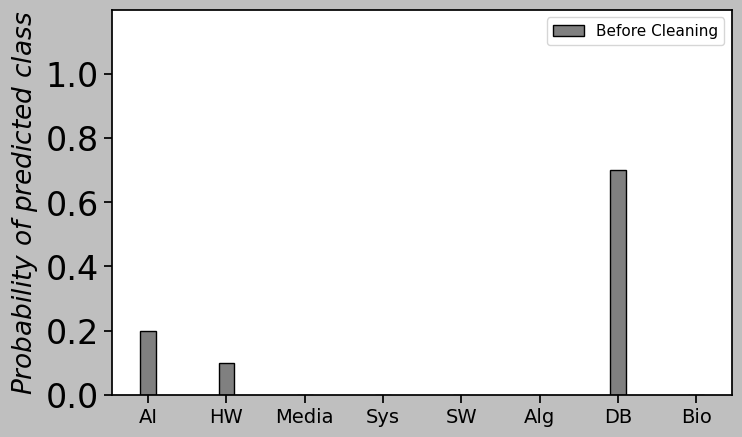

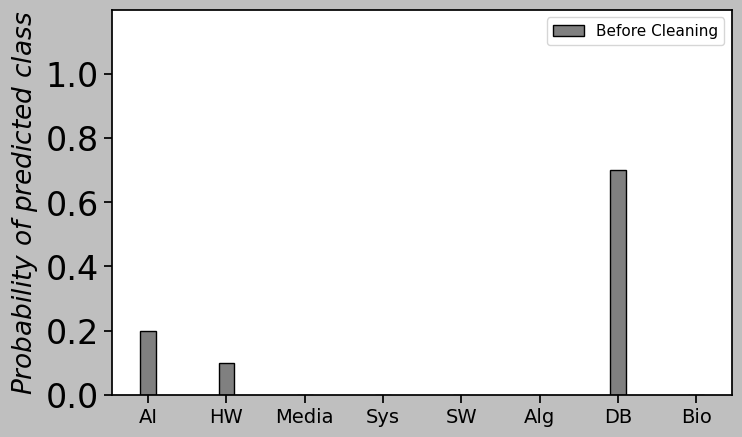

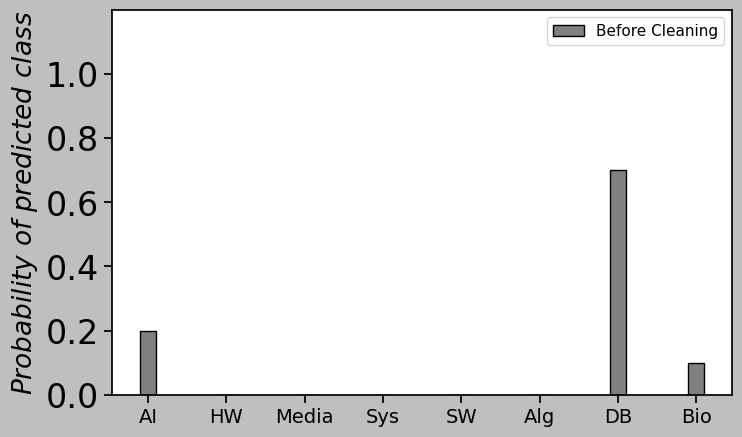

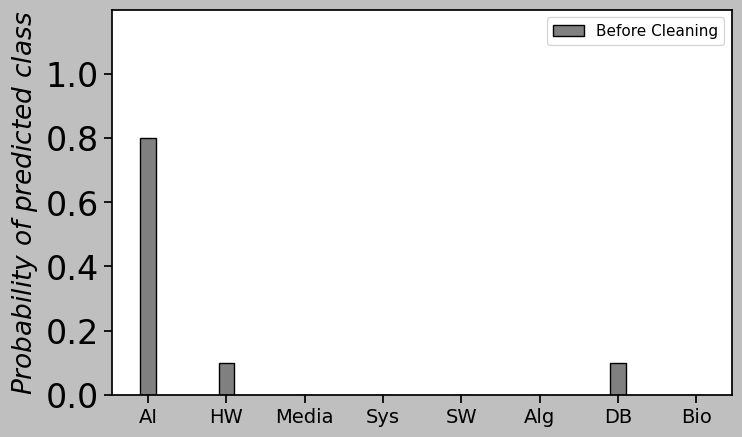

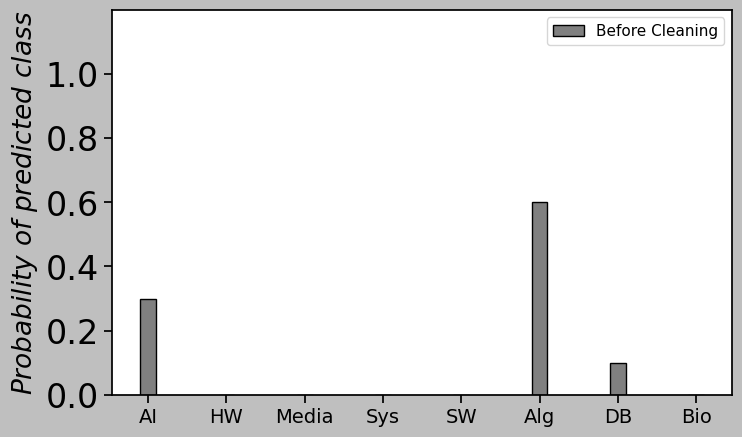

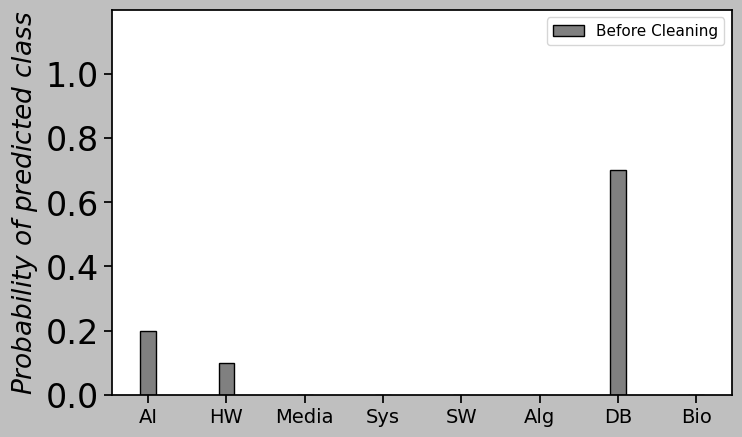

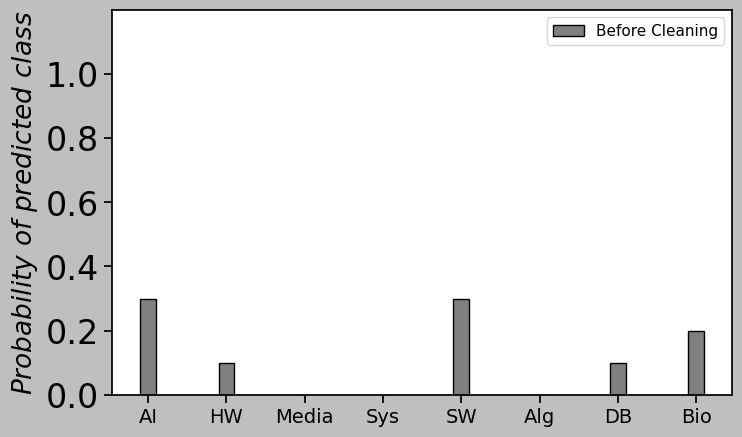

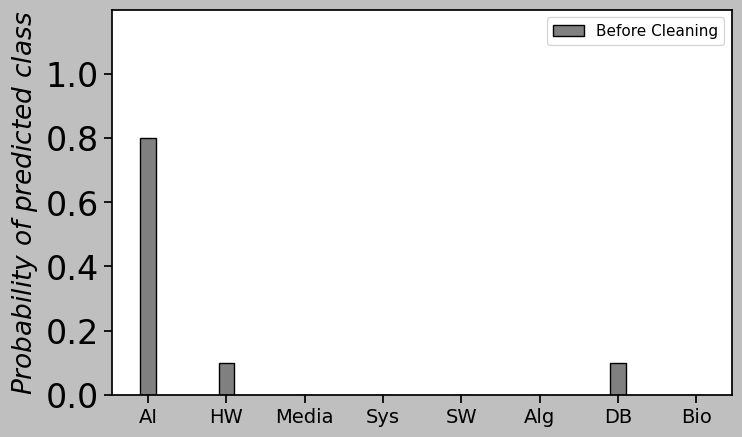

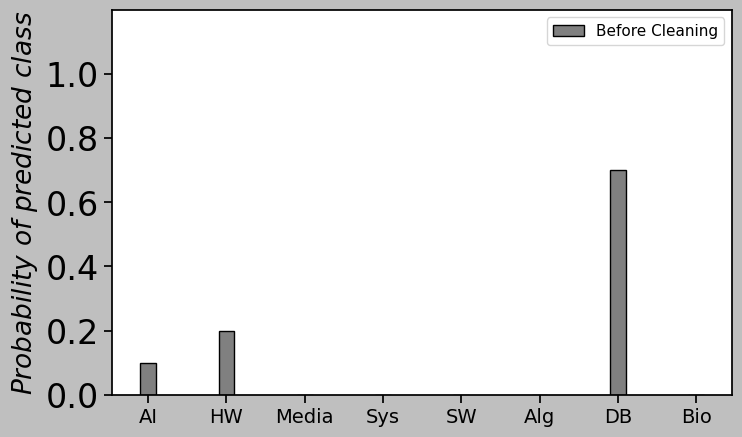

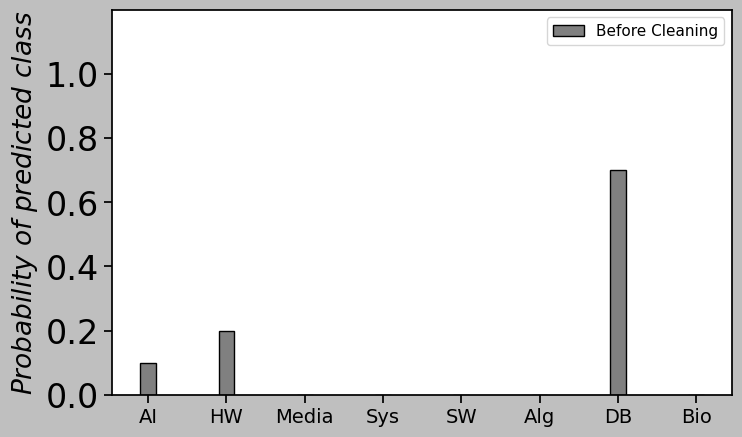

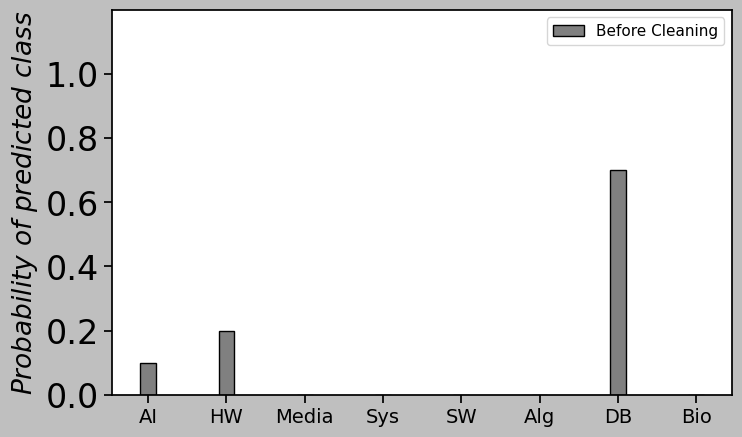

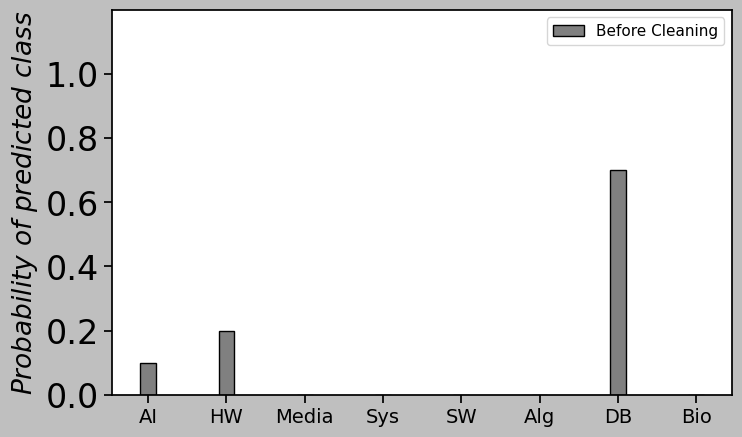

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 34

#data = list(labels.keys())



for keys, values in dict_for_plot_individually.items():
    plt.bar(labels_abb, values.detach().numpy(), color='grey', width=0.2, label="Before Cleaning")#str(keys))
    plt.xticks(fontsize=fontsize-20)
    plt.yticks([0,.2,.4,.6,.8,1],fontsize=fontsize-10)
    #plt.xlabel('Computer Science Research Categories', fontsize=fontsize-15)
    plt.ylabel('$Probability\ of\ predicted\ class$',fontsize=fontsize-15)

    plt.ylim(0,1.2)
    plt.legend()
    plt.savefig('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/names/' + str(keys) + '.pdf')
    plt.show()

In [ ]:

print("katja: ", authorID_2_nodefeatures_and_label[katja_id])       # Katja Hose
#print("Dong: ", authorID_2_nodefeatures_and_label[dong_id])        # Xin Luna Dong
print("Arijit: ", authorID_2_nodefeatures_and_label[arijit_id])
print("Gautam: ", authorID_2_nodefeatures_and_label[guatam_id])      # Gautam Das
print("Sun: ", authorID_2_nodefeatures_and_label[sun_id])         # Yingzhuo Sun
#print("Xin: ", authorID_2_nodefeatures_and_label[xin_id])
print("Zhang: ", authorID_2_nodefeatures_and_label[zhang_id])
print("Barna: ", authorID_2_nodefeatures_and_label[barna_id])

katja:  {'node_features': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'label': 6}
Arijit:  {'node_features': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [136]:
x1 = Margo_possible_world_preds_sums.detach().numpy()
x2 = Margo_possible_world_preds_updated_sums.detach().numpy()
x11=[]
x22=[]


In [137]:
for i in range(len(x1)):
    if x1[i] !=0 or x2[i] !=0:
         x11.append(x1[i])
         x22.append(x2[i])
x111 = np.array(x11)
x222 = np.array(x22)

In [138]:
print(x111, x222)

[0.3 0.1 0.3 0.1 0.2] [0.4 0.  0.3 0.2 0.1]


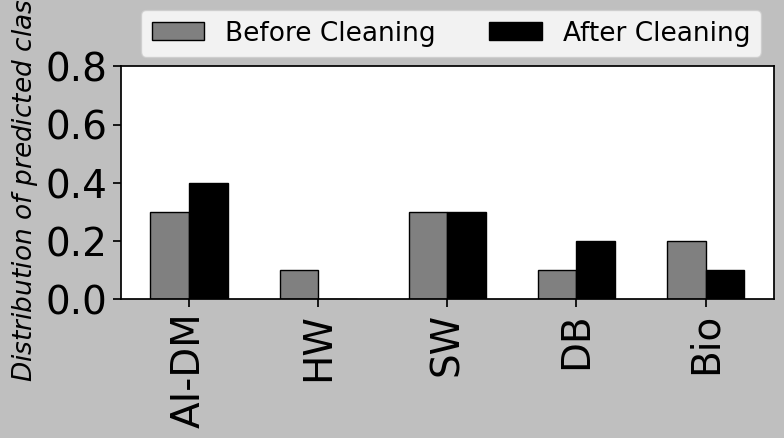

In [157]:
from torch_geometric.nn.kge import rotate
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 34

#data = list(labels.keys())
labels_abb = ["AI-DM", "HW", "SW", "DB", "Bio"]
ind = np.arange(len(labels_abb))
barWidth = 0.3
plt.bar([x - barWidth/2 for x in ind], x111, color='grey', width=barWidth, label="Before Cleaning")#str(keys))
plt.bar([x + barWidth/2 for x in ind], x222, color='black', width=barWidth, label="After Cleaning")#str(keys))
plt.xticks(ind, labels_abb, fontsize=fontsize-6, rotation=90)
plt.yticks([0,.2,.4,.6,.8],fontsize=fontsize-6)
#plt.xlabel('Computer Science Research Categories', fontsize=fontsize-15)
plt.ylabel('$Distribution\ of\ predicted\ class$',fontsize=fontsize-15)

plt.ylim(0,0.8)
plt.legend(ncol=2, fontsize=fontsize-15,bbox_to_anchor=(1, 1.3))
plt.tight_layout()
#plt.savefig('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/4names_before_after/MARGO_AFTER.pdf')
plt.savefig('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/4names_before_after/MARGO.pdf')
plt.show()

In [163]:
x = [0.4, 0.3, 0.2, 0.1]
sum = 0
for prob in x:
    sum+=-(prob*math.log2(prob) + (1-prob)*math.log2(1-prob))
print(sum)

3.0431651821620047


In [140]:
z1 = Barna_possible_world_preds_sums.detach().numpy()
z2 = Barna_possible_world_preds_updated_sums.detach().numpy()
z11=[]
z22=[]

In [141]:
for i in range(len(z1)):
    if z1[i] !=0 or z2[i] !=0:
         z11.append(z1[i])
         z22.append(z2[i])
z111 = np.array(z11)
z222 = np.array(z22)

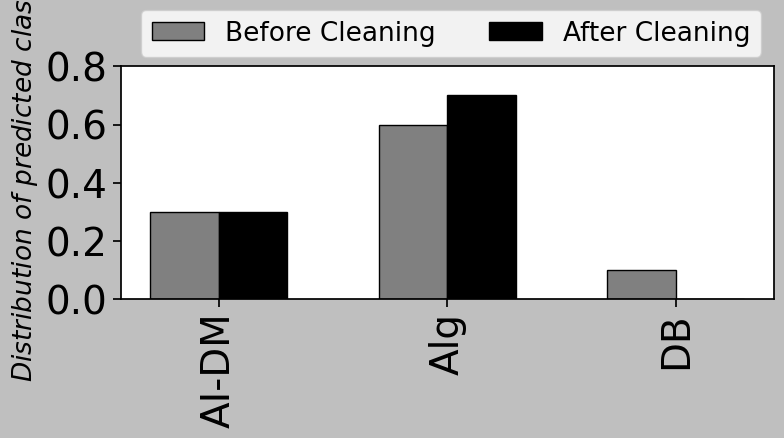

In [158]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 34

#data = list(labels.keys())
labels_abb = ["AI-DM", "Alg", "DB"]
ind = np.arange(len(labels_abb))
barWidth = 0.3

plt.bar([x - barWidth/2 for x in ind], z111, color='grey', width=barWidth, label="Before Cleaning")#str(keys))
plt.bar([x + barWidth/2 for x in ind], z222, color='black', width=barWidth, label="After Cleaning")#str(keys))
plt.xticks(ind, labels_abb, fontsize=fontsize-6, rotation=90)
plt.yticks([0,.2,.4,.6,.8],fontsize=fontsize-6)
#plt.xlabel('Computer Science Research Categories', fontsize=fontsize-15)
plt.ylabel('$Distribution\ of\ predicted\ class$',fontsize=fontsize-15)

plt.ylim(0,0.8)
plt.legend(ncol=2, fontsize=fontsize-15,bbox_to_anchor=(1, 1.3))
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/4names_before_after/Barna.pdf')
plt.show()

In [160]:
x = [0.3, 0.7]
sum = 0
for prob in x:
    sum+=-(prob*math.log2(prob) + (1-prob)*math.log2(1-prob))
print(sum)

1.7625817984613854


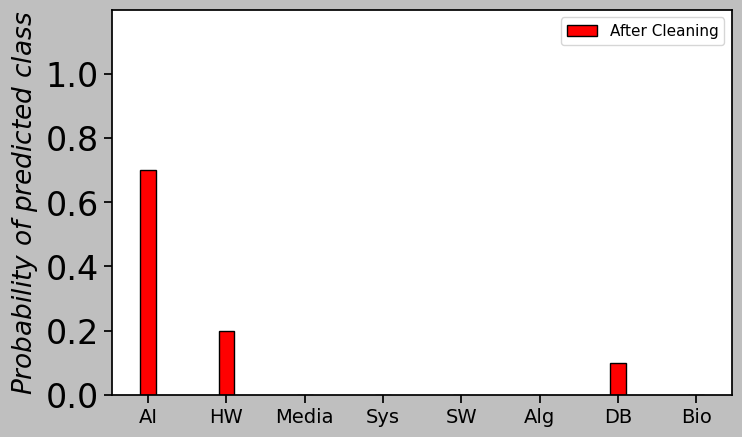

In [54]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 34

#data = list(labels.keys())



#plt.bar(labels_abb, Yizhou_possible_world_preds_sums.detach().numpy(), color='grey', width=0.2, label="Before Cleaning")#str(keys))
plt.bar(labels_abb, Yizhou_possible_world_preds_updated_sums.detach().numpy(), color='red', width=0.2, label="After Cleaning")#str(keys))
plt.xticks(fontsize=fontsize-20)
plt.yticks([0,.2,.4,.6,.8,1],fontsize=fontsize-10)
#plt.xlabel('Computer Science Research Categories', fontsize=fontsize-15)
plt.ylabel('$Probability\ of\ predicted\ class$',fontsize=fontsize-15)

plt.ylim(0,1.2)
plt.legend()
plt.savefig('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/4names_before_after/Yizhou_After.pdf')
plt.show()

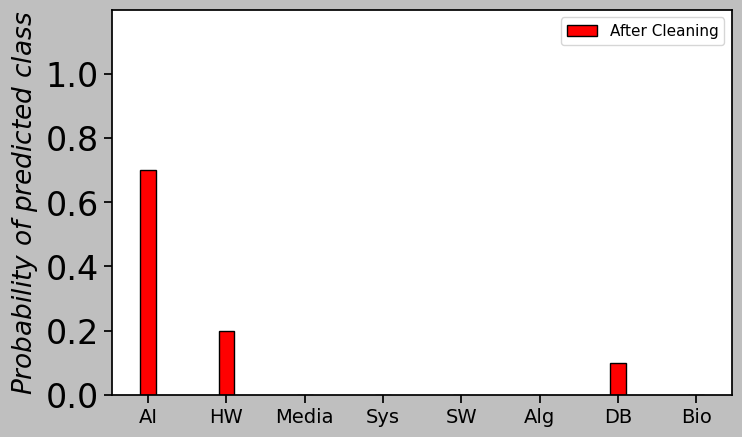

In [58]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 34

#data = list(labels.keys())



#plt.bar(labels_abb, Zhang_possible_world_preds_sums.detach().numpy(), color='grey', width=0.2, label="Before Cleaning")#str(keys))
plt.bar(labels_abb, Zhang_possible_world_preds_updated_sums.detach().numpy(), color='red', width=0.2, label="After Cleaning")#str(keys))
plt.xticks(fontsize=fontsize-20)
plt.yticks([0,.2,.4,.6,.8,1],fontsize=fontsize-10)
#plt.xlabel('Computer Science Research Categories', fontsize=fontsize-15)
plt.ylabel('$Probability\ of\ predicted\ class$',fontsize=fontsize-15)

plt.ylim(0,1.2)
plt.legend()
plt.savefig('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/4names_before_after/Zhang_After.pdf')
plt.show()

In [ ]:
for i in range(6):
    possible_world = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/output_possible_world' + str(i) + '.pt')
    edge_index = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/edge_index_T' + str(i) + '.pt')
    GNN_Model = GCN_model(hidden_channels=100)
    GNN_Model.load_state_dict(possible_world['model_state_dict'])
    preds = GNN_Model(data_x, edge_index)
    torch.save(preds, '/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/preds_on_pw_'+str(i)+'.pt')

In [ ]:
print(preds0.size())

torch.Size([632870, 8])


In [ ]:
candidate_list = []
for j in range(6):
    preds = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/preds_on_pw_'+str(j)+'.pt')
    index_list = []
    for i in range(preds.size()[0]):
        maximum = max(preds[i])
        minimum = min(preds[i])
        if (maximum - minimum) < 0.6:
            index_list.append(i)
    candidate_list.append(index_list)

In [ ]:
print(candidate_list)

[[], [], [], [98927], [149368, 149369], [164093, 164094], [], [], [190438], []]


In [ ]:
candidate_list_merged = []
for lst in candidate_list:
    candidate_list_merged.extend(lst)
print(len(candidate_list_merged))

6


In [ ]:
preds_aggregation = []
for i in range(len(candidate_list_merged)):
    preds_aggregation.append([])

In [ ]:
#Katja_possible_world_preds_sums = torch.sum(torch.stack(Katja_possible_world_preds), dim=0)
#print(Katja_possible_world_preds_sums)

for i in range(10):
    preds = torch.load('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/preds_on_pw_'+str(i)+'.pt')
    for j, index in enumerate(candidate_list_merged):
        B = torch.zeros_like(preds[index])
        B[torch.argmax(preds[index])] = 1
        preds_aggregation[j].append(B)

In [ ]:
preds_aggregation_summed = []
for lst in preds_aggregation:
    preds_aggregation_summed.append(torch.sum(torch.stack(lst), dim=0))

In [ ]:
candidate_names_list_merged = []
for id in candidate_list_merged:
    candidate_names_list_merged.append(authors_ID_2_name[id])

In [ ]:
print(len(preds_aggregation_summed))
print(len(candidate_names_list_merged))

6
6


In [ ]:
import torch
import torch.nn.functional as Fun
A = torch.tensor([.3, .4, .5, 0, .1, .2])
B = torch.zeros_like(A)
B[torch.argmax(A)] = 1
print(B)

tensor([0., 0., 1., 0., 0., 0.])


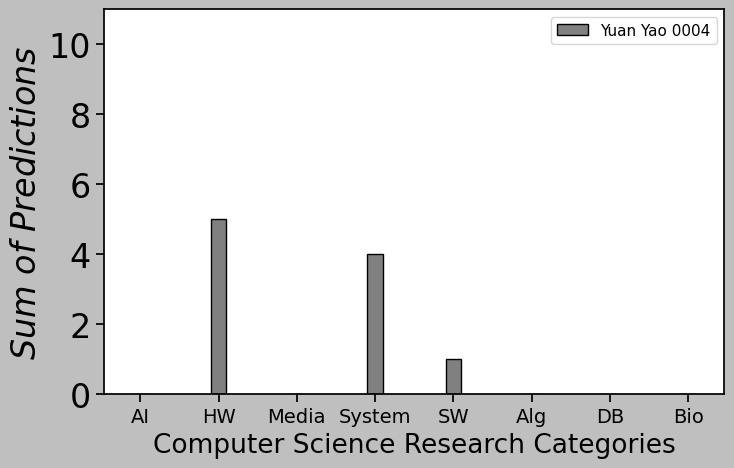

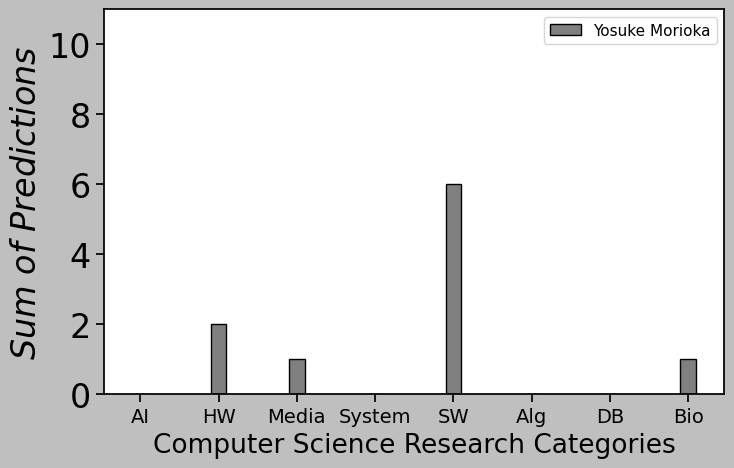

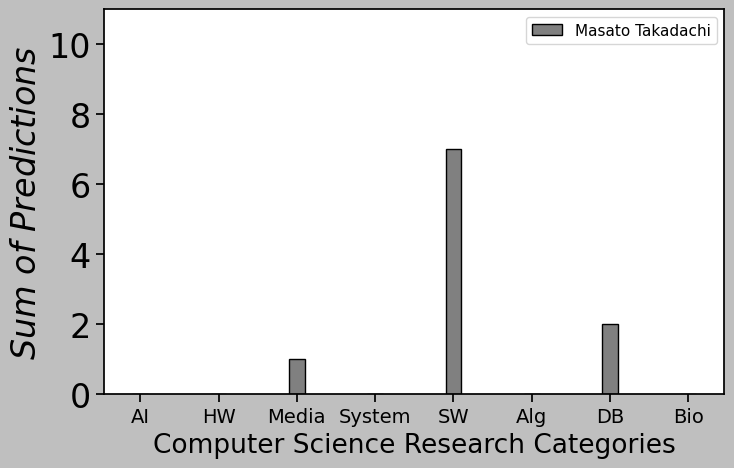

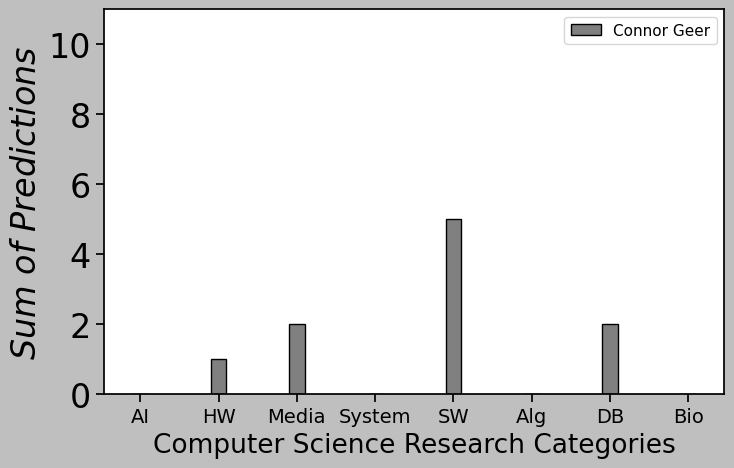

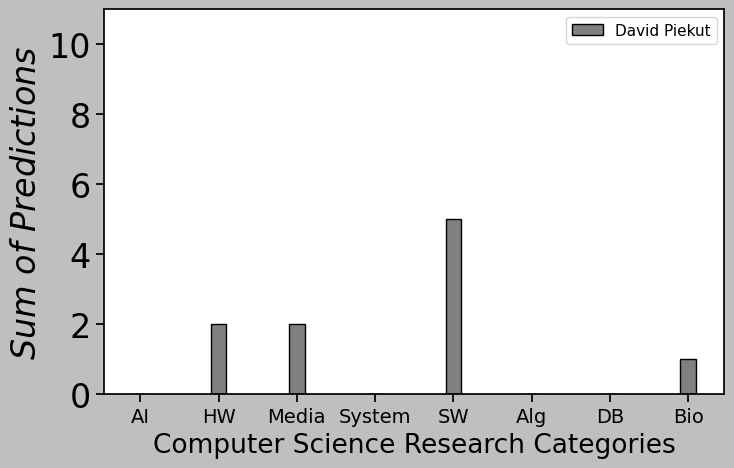

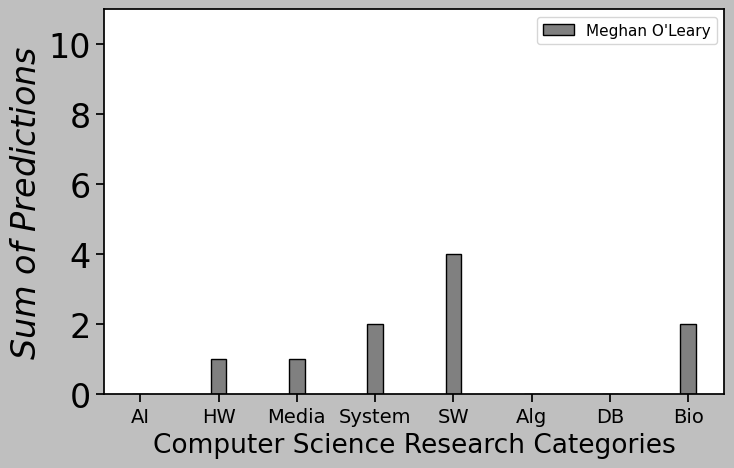

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D,lineStyles
from itertools import cycle
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("dark", {'axes.grid' : False})
sns.set_style("ticks")
plt.style.use('grayscale')
fontsize = 34

#data = list(labels.keys())



for i, pred in enumerate(preds_aggregation_summed):
    plt.bar(labels_abb, pred.detach().numpy(), color='grey', width=0.2, label=candidate_names_list_merged[i])
    plt.xticks(fontsize=fontsize-20)
    plt.yticks(fontsize=fontsize-10)
    plt.xlabel('Computer Science Research Categories', fontsize=fontsize-15)
    plt.ylabel('$Sum\ of\ Predictions$',fontsize=fontsize-10)

    plt.ylim(0,11)

    plt.legend()
    plt.savefig('/content/drive/My Drive/Node Classification on Uncertain Graph/Experiments/extracted_names/' + str(candidate_names_list_merged[i]) + '.png')
    plt.show()

In [ ]:
print(torch.argmax(preds[katja_index]))
print(torch.argmax(preds[Dong_index]))
print(torch.argmax(preds[Sun_index]))

tensor(0)
tensor(0)
tensor(1)


Katja data mining
Dong data mining

In [ ]:
pathname = "/content/drive/My Drive/Node Classification on Uncertain Graph/Dataset/"
authors_adj_list = np.load(pathname + "authors_adj_list.npy", allow_pickle=True).item()

In [ ]:
katja_coauthors = authors_adj_list[katja_id]
dong_coauthors = authors_adj_list[dong_id]

NameError: ignored

In [ ]:
print(katja_coauthors)
print(dong_coauthors)

[147, 148, 133, 149, 150, 765, 766, 767, 768, 769, 770, 771, 772, 773, 797, 798, 986, 987, 988, 989, 634, 2058, 2059, 2816, 2817, 2338, 2818, 2852, 3372, 3373, 4031, 4032, 4274, 4275, 223, 4209, 1178, 1004, 4687, 541, 3091, 3092, 3093, 1867, 5375, 5376, 5377, 4510, 2633, 510, 1463, 5863, 2102, 5937, 5938, 539, 5939, 6900, 4540, 7631, 7632, 7633, 7634, 7635, 7636, 9718, 9719, 3394, 9720, 2226, 944, 3420, 4289, 1585, 910, 5262, 719, 9789, 335, 9790, 3466, 356, 1949, 1005, 1006, 12101, 12102, 12103, 12104, 12105, 12106, 12107, 12108, 333, 334, 12109, 12110, 12111, 12112, 12113, 12114, 12115, 12116, 12117, 448, 14857, 2222, 14858, 14859, 16406, 16407, 16972, 16973, 11228, 16974, 21351, 21352, 24244, 24104, 24245, 24246, 980, 24247, 24248, 24249, 24250, 24521, 24522, 24523, 24524, 25263, 12048, 38431, 27620, 27619, 39217, 8995, 39156, 39218, 39154, 40306, 40307, 40308, 40309, 40310, 40466, 40467, 40468, 40834, 40835, 40836, 23387, 40837, 42072, 41163, 42073, 39023, 42415, 42416, 1647, 40291

In [ ]:
authors_ID_2_name = {v: k for k, v in authors_name_2_ID.items()}

katija coauthors

In [ ]:
i=0
for id in katja_coauthors:
    print(authors_ID_2_name[id])
    i+=1
    #if i == 10:
    #    break

Streaming output truncated to the last 5000 lines.
esse Wright
Sergio Jos
 Rodr
guez M
Armin Haller
Kerry Taylor
Pouya Ghiasnezhad Omran
Hans-Peter Schnurr
Niko Beerenwinkel
rg Rahnenf
hrer
Martin D
umer
Daniel Hoffmann
Rolf Kaiser
Joachim Selbig
Josephine Hoh
Steffen Heber
Jens Stoye
rg D. Hoheisel
Martin Vingron
Erez Hartuv
Armin O. Schmitt
rg Lange
Sebastian Meier-Ewert
Hans Lehrach
Ron Shamir
Hendrik Fischer
rn Frank
Bert Ungeth
Matthias Drobig
Andreas Walte
Gerhard Matz
Annemarie K
sbohrer
Matthias Filter
Angela K
rner
Anneluise Mader
rgen Zentek
Bernd Appel
Robert H. Stark
Franke Sonnemann
rgen Urban
Dieter Weixelbaum
Armin A. Weiser
Alexander Falenski
rgen Brandt
Hauke Vagts
Erik Krempel
rgen Beyerer
Christoph Bier
Pascal Birnstill
bor Sz
rnyas
Arnau Prat-P
Alex Averbuch
zsef Marton
Marcus Paradies
Moritz Kaufmann
Peter A. Boncz
Vlad Haprian
nos Benjamin Antal
Ralf Naues
rgen Beyer
Ulrich Isensee
Heinz Droste
rgen F. R
ler
Lutz H.-J. Lampe
Wolfgang H. Gerstacker
Johannes B. Hube

In [ ]:
i=0
for id in dong_coauthors:
    print(authors_ID_2_name[id])
    i+=1
    #if i == 10:
    #    break

Yongcheng Jing
Yiding Yang
Xinchao Wang
Mingli Song
Dacheng Tao
Zimo Liu
Jingya Wang
Shaogang Gong
Huchuan Lu
Lianbo Zhang
Shaoli Huang
Wei Liu 0007
Mingming Gong
Cheng Deng
Rongrong Ji
Wei Liu 0005
Xinbo Gao 0001
Zhibin Hong
Xue Mei
Danil V. Prokhorov
Jingyuan Li
Fengxiang He
Lefei Zhang
Bo Du 0001
Hao Wang 0062
Junchi Yan
Haibo Qiu
Baosheng Yu
Dihong Gong
Zhifeng Li 0001
Yufei Xu
Jing Zhang 0037
Lei Huang 0015
Xianglong Liu 0001
Yang Liu 0088
Bo Lang
Bolun Cai
Xianming Xu
Kailing Guo
Kui Jia
Bin Hu
Zhe Xu 0003
Ya Zhang 0002
Fusheng Hao
Jun Cheng 0002
Lei Wang 0018
Jianzhong Cao
Wenyuan Xue
Wen Wang
Qingyong Li
Jue Wang
Yajing Kong
Liu Liu 0014
Jun Wang 0002
Zhou Yu 0001
Jun Yu 0002
Jianping Fan 0001
Shunchang Liu
Jiakai Wang
Aishan Liu
Yingwei Li
Yijie Gao
Wei Xiong 0008
Ruimin Hu
Jun Li 0010
Dongjin Song
David A. Meyer 0001
Chen Gong 0002
Hengmin Zhang
Jian Yang 0003
Xikun Zhang 0002
Tianyi Zhou 0001
Wei Bian
Jialie Shen
Jianzhuang Liu
Ya Li
Xinmei Tian 0001
Qian Zhang 0009
Wei Zhen

In [ ]:

print(authors_name_2_ID['Arijit Khan 0001'])
arijit_id = authors_name_2_ID['Arijit Khan 0001']

66037


In [ ]:
arijit_coauthors = authors_adj_list[arijit_id]

NameError: ignored

In [ ]:
print(arijit_coauthors)

[26575, 26576, 24783, 24868, 28446, 25229, 27208, 34082, 26813, 32292, 31645, 34083, 34084, 35925, 30011, 25779, 51928, 36203, 29617, 25231, 25651, 33718, 25228, 68607, 32993, 26669, 36241, 25695, 70034, 32107, 51279, 63762, 26408, 25415, 70192, 70193, 31907, 70541, 24794, 30978, 36530, 29616, 29615, 33891, 71455, 27053, 27052, 71480, 68487, 70856, 25354, 68286, 126897, 54903, 29131, 165822, 166779, 28040, 53505, 26941, 85993, 30418, 29855, 26118, 73272, 28610, 125460, 37224, 73253, 26418, 67427, 24784, 32463, 26305, 32797, 27784, 176500, 72335, 49602, 128908, 176999, 26301, 67696, 52433, 44926, 57771, 190091, 192653, 38780, 30966, 28314, 31433, 31290, 35176, 32643, 285382, 315610, 25230, 25012, 127327, 30262, 30545, 96054, 28478, 69146, 181323, 129590, 320994, 26928, 28326, 28327, 24776, 26157, 36067, 37948, 49974, 32408, 50141, 48777, 53964, 53965, 69252, 165353, 165354, 165355, 168508, 168509, 56485, 56487, 30448, 52036, 35761, 344878, 29376, 26185, 29377, 27295, 29463, 29464, 29195

In [ ]:
for id in arijit_coauthors:
    print(authors_ID_2_name[id])

Shang Liu
Wanli Gu
Gao Cong
Fuzheng Zhang
Kaiqi Zhao 0001
Aixin Sun
Yile Chen
Xiucheng Li
Zhifeng Bao
Cheng Long
Yiding Liu
Arun Kumar Chandran
Richard Ellison
Zhen Hai
Kuiyu Chang
Bing Liu 0001
Ali Zonoozi
Qirong Ho
Shonali Krishnaswamy
Jialong Han
Wayne Xin Zhao
Zongcheng Ji
Minh C. Phan
Yanhong Zhou
Bin Cui 0001
Christian S. Jensen
Junjie Yao
Wei Wei 0002
Shanshan Feng
Arijit Khan 0001
Yong Liu
Yeow Meng Chee
Yixiang Fang
Reynold Cheng
Jikun Wang
Lukito Budiman
Nikos Mamoulis
Zhida Chen
Zhenjie Zhang
Tom Z. J. Fu
Lisi Chen
Tuan-Anh Nguyen Pham
Xutao Li
Yun Li
Hanyu Li
Mong-Li Lee
Wynne Hsu
Zheng Wang 0046
Kaiyu Feng
Sheng Wang 0007
J. Shane Culpepper
Timos Sellis
Pasquale Balsebre
Dezhong Yao 0002
Jin Yao Chin
Ce Ju
Lei Han 0001
Guojie Song
Kunqing Xie
Di Yao 0001
Haonan Hu
Lun Du
Shi Han
Jingping Bi
Qianru Zhang
Walid G. Aref
Peizhi Wu
Xiangyu Ke
Junghoon Kim
Siqiang Luo
Wenyuan Yu
Wenfei Fan
Philip Bohannon
Anastasios Kementsietsidis
Tao Guo
Farhana Murtaza Choudhury
Jingyi Yang
T

Gautam Das, Xin Luna Dong, Yizhuo Sun, Katja Hose

In [ ]:
for name in list(authors_name_2_ID.keys()):
    if 'Yizhou Sun' in name:
        print(name)
#katja_id = authors_name_2_ID['Katja Hose']

Yizhou Sun
